In [18]:
pip install micromlgen

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
data = pd.read_csv("/content/drive/My Drive/Trabajo de Grado/Tesis/Pruebas/Multicriterio/Datasets/datos_predichosARBOL.csv")
#data = pd.read_csv("/content/drive/My Drive/Trabajo de Grado/Tesis/Pruebas/Multicriterio/Datasets/datos_predichos_equilibrados.csv")
data.head(10)

,Promedio Temperatura,Promedio Humedad,Promedio CO2,Promedio TVCO,Suma,Alerta predicha
0,0.440205,0.168472,0.074892,0.015264,0.698834,Muy Alto
1,0.113952,0.180013,0.135815,0.080880,0.510661,Alto
2,0.366971,0.165835,0.012062,0.067152,0.612020,Alto
3,0.375294,0.131329,0.001785,0.034272,0.542679,Alto
4,0.418682,0.071505,0.088985,0.045456,0.624627,Muy Alto
5,0.412423,0.160093,0.007508,0.098880,0.678903,Muy Alto
6,0.139181,0.072855,0.020554,0.020400,0.252990,Medio
7,0.383324,0.151435,0.101354,0.045888,0.682001,Muy Alto
8,0.031479,0.229062,0.104431,0.095904,0.460876,Alto
9,0.330314,0.059820,0.152985,0.048864,0.591983,Alto


In [35]:
data = data.rename(columns={'Promedio TVCO': 'Promedio TVOC'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Promedio Temperatura  10000 non-null  float64
 1   Promedio Humedad      10000 non-null  float64
 2   Promedio CO2          10000 non-null  float64
 3   Promedio TVOC         10000 non-null  float64
 4   Suma                  10000 non-null  float64
 5   Alerta predicha       10000 non-null  object 
dtypes: float64(5), object(1)
memory usage: 468.9+ KB



Valores faltantes por columna:
Promedio Temperatura    0
Promedio Humedad        0
Promedio CO2            0
Promedio TVOC           0
Suma                    0
Alerta predicha         0
dtype: int64

Estadísticas descriptivas:
       Promedio Temperatura  Promedio Humedad  Promedio CO2  Promedio TVOC  \
count          10000.000000      10000.000000  10000.000000   10000.000000   
mean               0.238999          0.120315      0.080184       0.059595   
std                0.139046          0.069487      0.046045       0.034741   
min                0.000006          0.000001      0.000000       0.000000   
25%                0.117383          0.060956      0.040415       0.029328   
50%                0.237552          0.119365      0.080000       0.059832   
75%                0.359064          0.180489      0.120077       0.089808   
max                0.479951          0.239974      0.160000       0.120000   

               Suma  
count  10000.000000  
mean       0.499093  
st

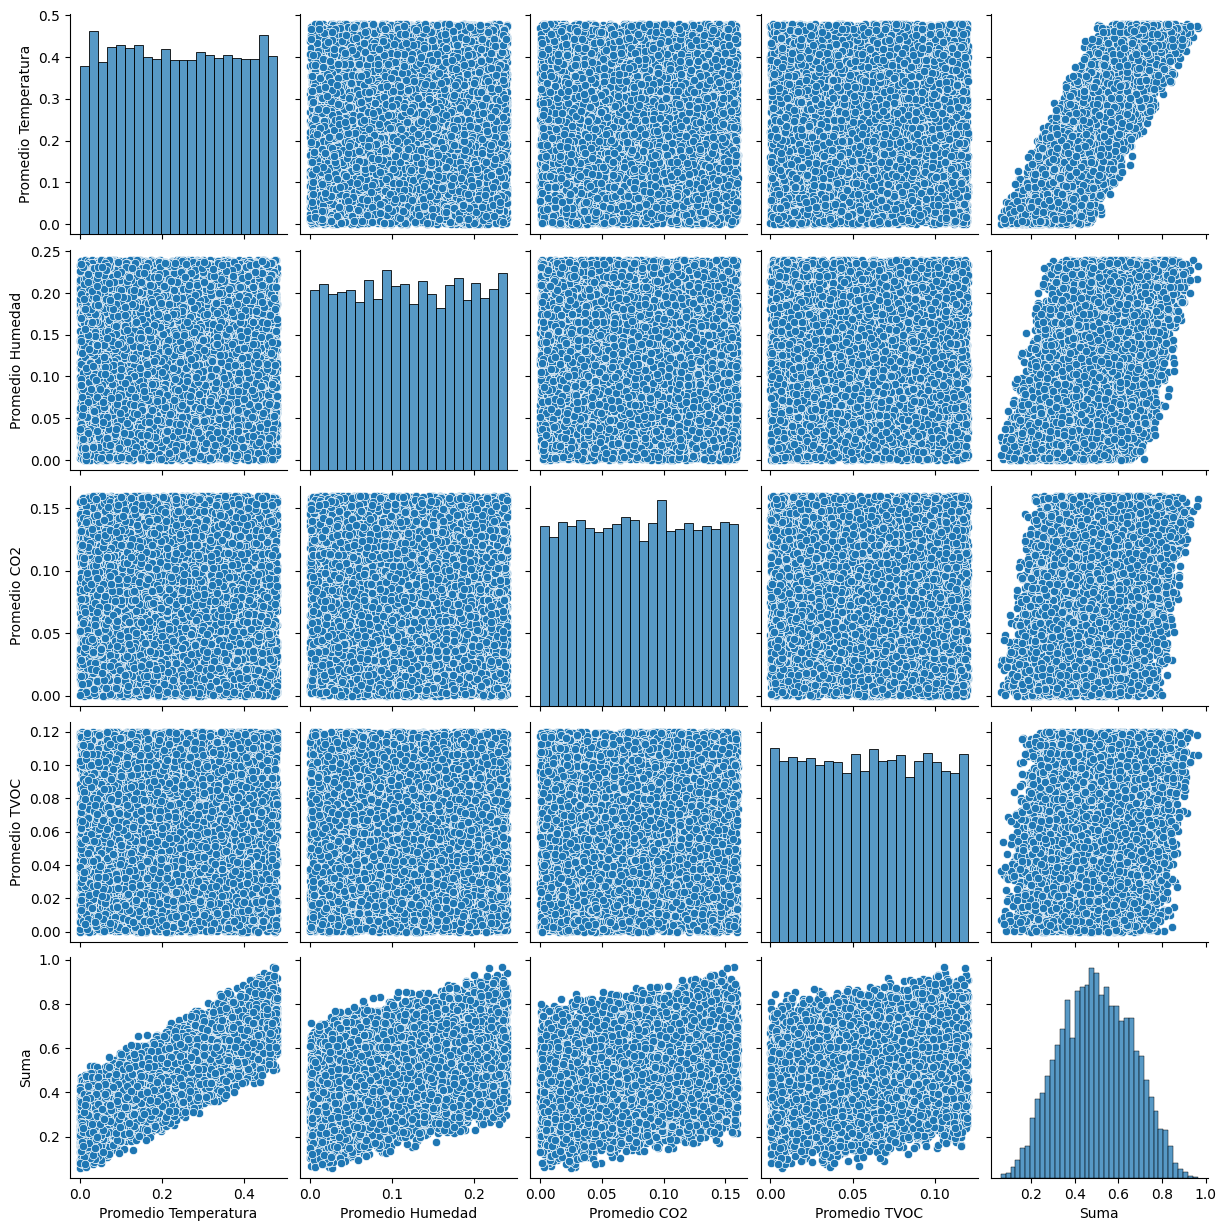

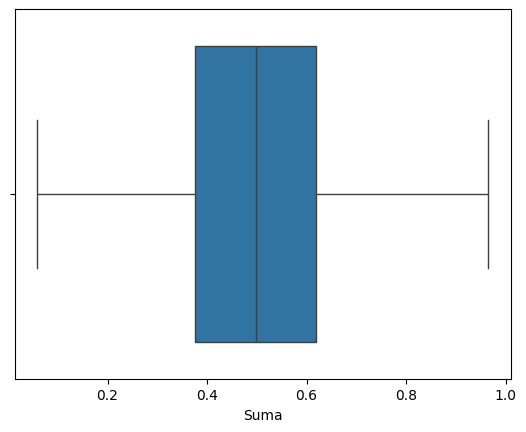

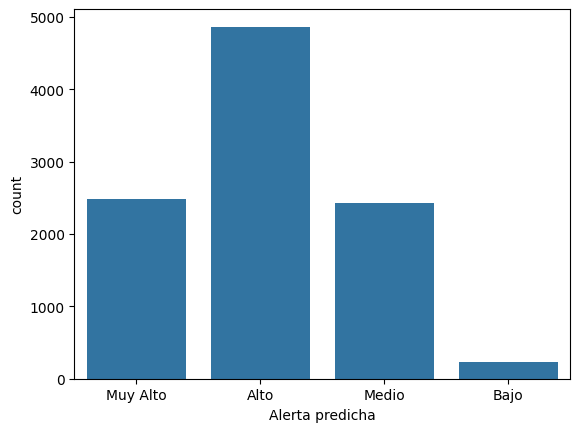

<ipython-input-36-687cf0e5684c>:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


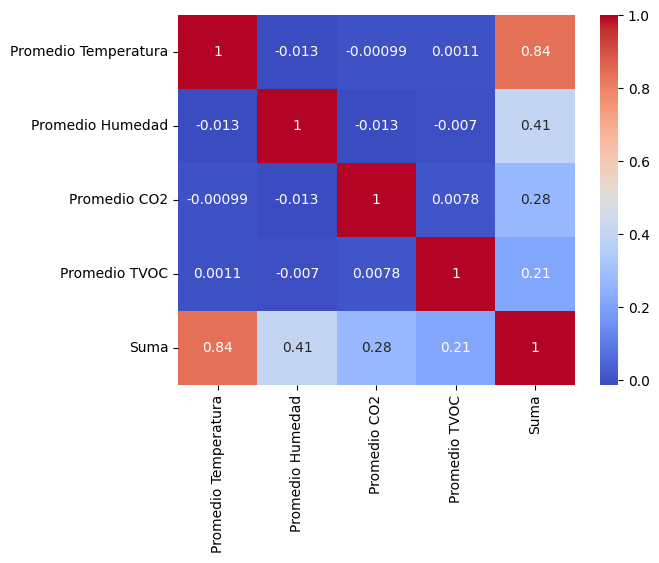

In [36]:
# Manejo de valores faltantes
print("\nValores faltantes por columna:")
print(data.isnull().sum())

# Distribución de datos
print("\nEstadísticas descriptivas:")
print(data.describe())

# Visualización de distribución de variables numéricas
sns.pairplot(data)
plt.show()

# Detección de valores atípicos en una variable numérica (por ejemplo, 'edad')
sns.boxplot(x=data['Suma'])
plt.show()

# Balance de clases (si es aplicable)
sns.countplot(x='Alerta predicha', data=data)
plt.show()

# Correlación entre variables numéricas
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [37]:
data['Alerta predicha'].value_counts()

Alto        4867
Muy Alto    2481
Medio       2424
Bajo         228
Name: Alerta predicha, dtype: int64

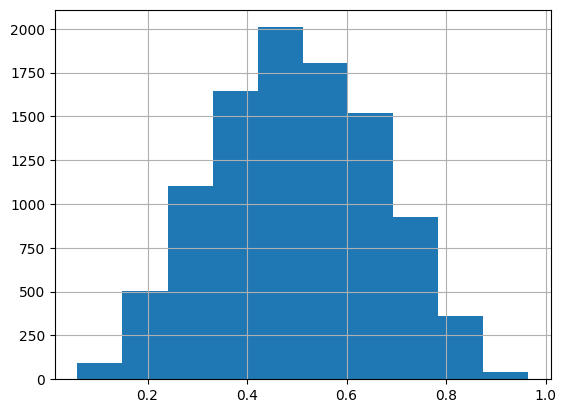

In [38]:
data['Suma'].hist()
plt.show()

In [39]:
# Variables predictoras
X = data.iloc[:,0:4]

# Variable a predecir
Y = data.iloc[:,5]

X.head()

,Promedio Temperatura,Promedio Humedad,Promedio CO2,Promedio TVOC
0,0.440205,0.168472,0.074892,0.015264
1,0.113952,0.180013,0.135815,0.080880
2,0.366971,0.165835,0.012062,0.067152
3,0.375294,0.131329,0.001785,0.034272
4,0.418682,0.071505,0.088985,0.045456


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.4, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 2480 to 7270
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Promedio Temperatura  4000 non-null   float64
 1   Promedio Humedad      4000 non-null   float64
 2   Promedio CO2          4000 non-null   float64
 3   Promedio TVOC         4000 non-null   float64
dtypes: float64(4)
memory usage: 156.2 KB


In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from micromlgen import port

# Aplicar SMOTE para el sobre-muestreo de la clase minoritaria
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)
Y_train_resampled.value_counts()

Alto        1997
Medio       1997
Muy Alto    1997
Bajo        1997
Name: Alerta predicha, dtype: int64

In [42]:
# Crear y entrenar el modelo de árbol de decisión
arbol = DecisionTreeClassifier()#max_depth=5)
arbol_varroa = arbol.fit(X_train_resampled, Y_train_resampled)

# Imprimir el código C++ para microcontroladores
print(port(arbol_varroa))

# Obtener el código C++ para microcontroladores
codigo_cxx = port(arbol_varroa)

# Guardar el código en un archivo
nombre_archivo = "Arbol.txt"
with open(nombre_archivo, "w") as archivo:
    print(codigo_cxx, file=archivo)

# Imprimir el código C++
#print(codigo_cxx)

# Contar las líneas
#cantidad_lineas = codigo_cxx.count('\n') + 1
#print(f"La cantidad de líneas en el código C++ es: {cantidad_lineas}")

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class DecisionTree {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        if (x[0] <= 0.23491688817739487) {
                            if (x[0] <= 0.059159522876143456) {
                                if (x[1] <= 0.09533899277448654) {
                                    if (x[3] <= 0.07925450429320335) {
                                        if (x[2] <= 0.14326824992895126) {
                                            if (x[2] <= 0.06569389998912811) {
                                                if (x[3] <= 0.048885924741625786) {
                                                    if (x[2] <= 0.05261882208287716) {
                                                        return 1;
                                               

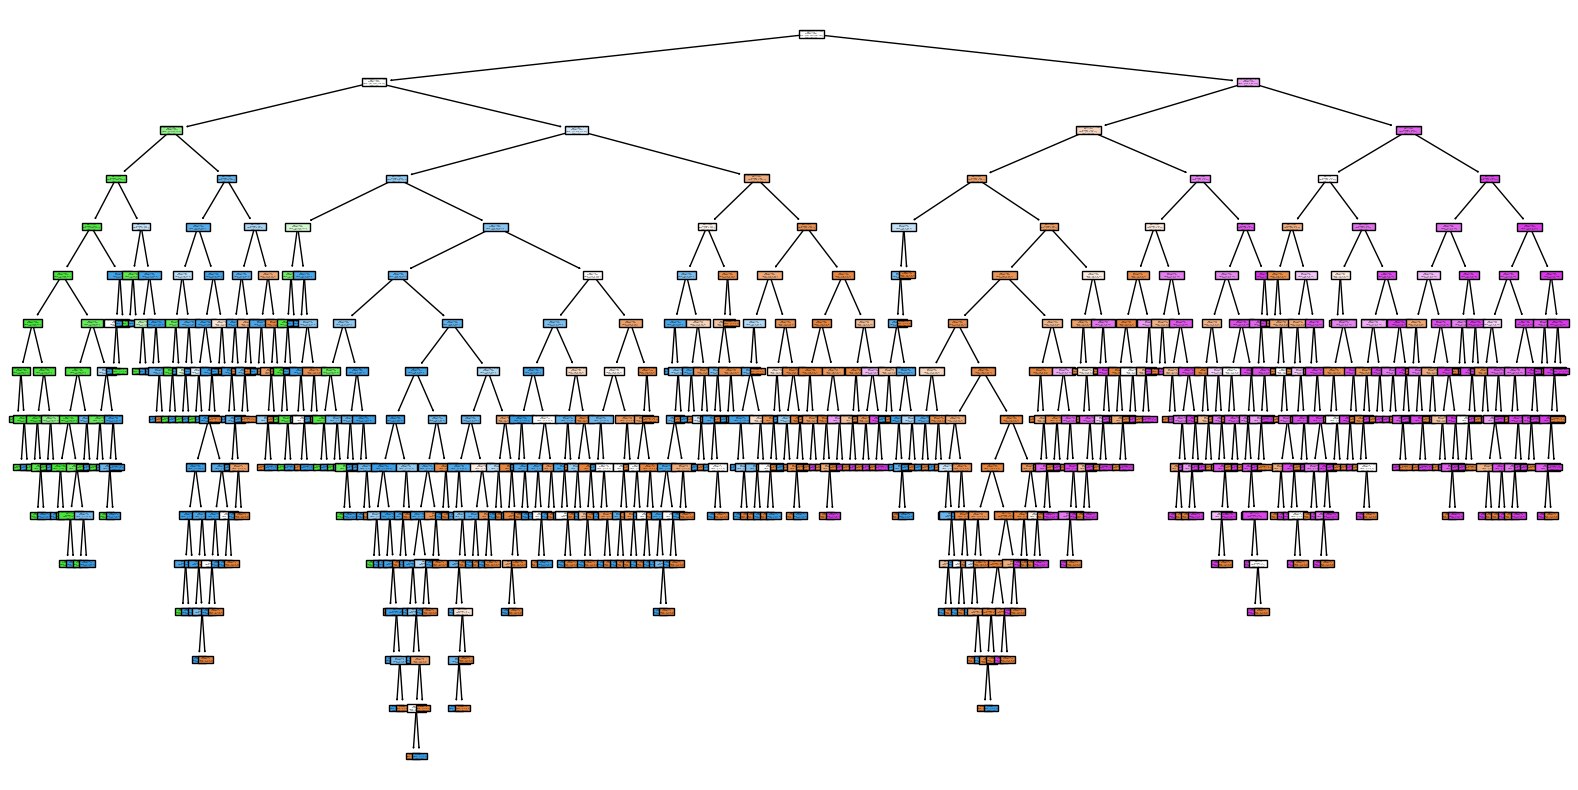

In [43]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(20,10))
tree.plot_tree(arbol_varroa, feature_names=list(X.columns.values), class_names=list(Y.values), filled=True)
plt.show()

In [44]:
Y_pred = arbol_varroa.predict(X_test)

Y_pred

array(['Medio', 'Muy Alto', 'Muy Alto', ..., 'Alto', 'Muy Alto', 'Medio'],
      dtype=object)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
matriz = confusion_matrix(Y_test, Y_pred)
matriz

array([[2578,    0,  132,  160],
       [   0,  107,   29,    0],
       [ 146,   33, 1304,    0],
       [ 145,    0,    0, 1366]])

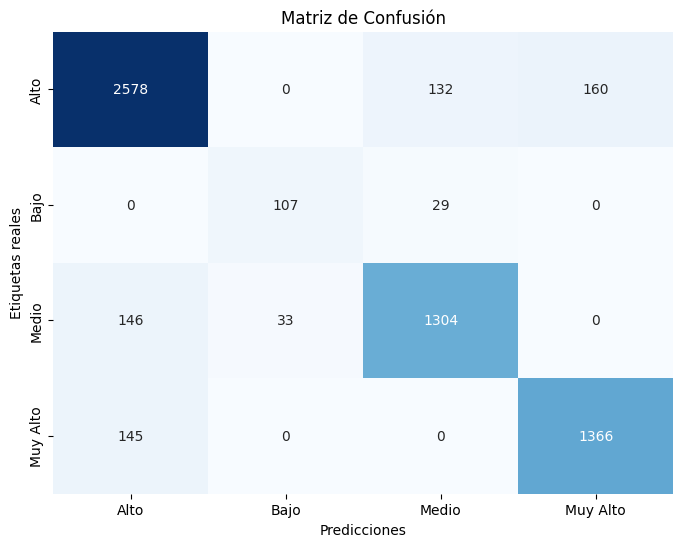

In [46]:
# Etiquetas de las clases
class_names = ['Alto', 'Bajo', 'Medio', 'Muy Alto']

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')
plt.title('Matriz de Confusión')
plt.show()

In [47]:
# Calcular la exactitud (Accuracy)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Exactitud (Accuracy): {accuracy}")

# Reporte de Clasificación (precision, recall, f1-score)
reporte_clasificacion = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(reporte_clasificacion)

matriz

Exactitud (Accuracy): 0.8925
Reporte de Clasificación:
              precision    recall  f1-score   support

        Alto       0.90      0.90      0.90      2870
        Bajo       0.76      0.79      0.78       136
       Medio       0.89      0.88      0.88      1483
    Muy Alto       0.90      0.90      0.90      1511

    accuracy                           0.89      6000
   macro avg       0.86      0.87      0.86      6000
weighted avg       0.89      0.89      0.89      6000



array([[2578,    0,  132,  160],
       [   0,  107,   29,    0],
       [ 146,   33, 1304,    0],
       [ 145,    0,    0, 1366]])